### Modelling
This notebook's purpose is the development of an ML model to determine the top influences on Airbnb listing prices.

As the data has been sufficiently prepared in the previous notebook, this notebook will start with training a linear regression model right away. While it is not unlikely, that a more sophisticated approach would yield mor eprecise predicitons, it should be pointed out, that the purpose of the model is not prediction, but explanation, adn therefore, the main focus is not precision, but interpretability.

### Load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
reg_df = pd.read_csv('price_determinats_ml_rdy.csv')

### Prepare data

In [3]:
# Split data in matrices
X = np.array(reg_df.drop('price',axis=1))
y = np.array(reg_df.loc[:,'price'])

### Create Model

In [4]:
# Create model
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X,y)
yhat = linreg.predict(X)
residuals = y-yhat
print('R2_score: {}'.format(r2_score(y,yhat)))

R2_score: 0.6255930845565308


### Interpret results

In [5]:
# Create coefficients df
result = pd.DataFrame(
    {'feature':reg_df.drop('price',axis=1).columns,
     'coefficients':linreg.coef_,
     'abs_coefficients':[abs(coef) for coef in linreg.coef_]}
).sort_values(by='abs_coefficients',ascending=False)

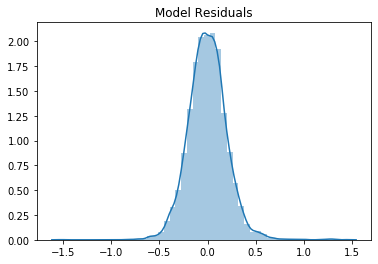

In [6]:
# Show KDE of residuals
sns.distplot(residuals).set_title('Model Residuals')
plt.savefig('resid')

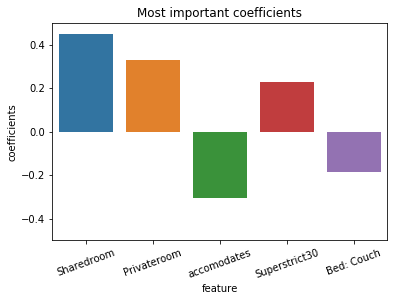

In [7]:
# Show important coefficients
sns.barplot(x='feature',
            y='coefficients',
            orient='v',
            data=result.loc[result.abs_coefficients>=(result.abs_coefficients.mean()+result.abs_coefficients.std())]
           ).set_title('Most important coefficients')
plt.xticks([0,1,2,3,4],['Sharedroom','Privateroom','accomodates','Superstrict30','Bed: Couch'],rotation=20)
plt.ylim(-0.5,0.5)
plt.savefig('coef_main')

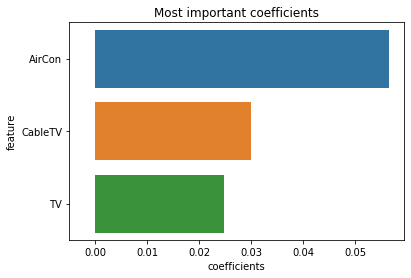

In [8]:
# Show most importance of amenities
amenities = ['has_Air Conditioning','has_Cable TV','has_TV','has_Family/Kid Friendly']
sns.barplot(x='coefficients',
            y='feature',
            data=result.loc[result.feature.isin(amenities)]
           ).set_title('Most important coefficients')
plt.yticks([0,1,2,3],['AirCon','CableTV','TV','Family Friendly'])
plt.ylim(2.5,-0.5)
plt.savefig('coef_amen')

In [9]:
result

,feature,coefficients,abs_coefficients
0,accommodates,4.500357e-01,4.500357e-01
4,cleaning_fee,3.297709e-01,3.297709e-01
32,room_type_Sharedroom,-3.056923e-01,3.056923e-01
1,bathrooms,2.265729e-01,2.265729e-01
31,room_type_Privateroom,-1.870644e-01,1.870644e-01
41,cancellation_policy_superstrict30,1.594432e-01,1.594432e-01
34,bed_type_Couch,1.158373e-01,1.158373e-01
37,bed_type_RealBed,1.065986e-01,1.065986e-01
16,neighbourhood_group_cleansed_Interbay,9.486693e-02,9.486693e-02
14,neighbourhood_group_cleansed_Delridge,-9.413735e-02,9.413735e-02


###### Summary
First off, the model shows, that the few selected features describe the target variable well, by explaining almost two thirds of its variance. Furthermore, the residuals are unbiased and appear to be at least close to normally distributed.

The graphs show, that there are several rather strong coefficents in the model, however as the results table show, others, even those, which showed a high correlation to the target in the previous notebook, turned out to be virtaully meaningless, most noteably so square_feet.

Lastly, it can be seen, that there were only few amenities, that made it to this stage, and of those four, one proves to have no meaningful effect.

### Conclusion

To return now to the beginning of this analysis, the results wil be reviewed with special regard towards the initial hypotheses.

###### 1. Importance of room size
The data shows, that the first hypothesis is not granular enough to be answered by the data. While some (semi-)size-related features appear to be rather important (room type and accomodates), the main indicator for size (square-feet) turns out to be rather meaningless. With the results at hand, the hypothesis can neither be confidently accepted nor discarded.

###### 2. Importance of  Provision Cost of Amenities
The results show, that even if an amenity shows a significant correlation to the target (e.g. family-friendliness), this does not neccessarily reflect in the respective coefficient. In the special case of family-friendliness, the positive correlation is completely offset by other features in the regression, which provides partial support for the initial hypotheses. Furthermore, amenities, which may cause the host additional provision cost, stay at least somewhat relevant in the regression (air conditioning, TV). However, one might argue, that other potentially cost-causing amenities were not even included in the regression due to the lack of clear correlation. Due to this consideration, the second hypothesis can neither be confidently accepted nor discarded.

###### 3. Rating prediction
For the sake of clarity and modularity, the model for the third hypothesis question can be found in the next notebook.